## Лабораторная работа №1. Предобработка данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
def plot(data):
    n_bins = 20

    fig, axs = plt.subplots(2, 3)
    axs[0, 0].hist(data[:, 0], bins = n_bins)
    axs[0, 0].set_title('age')
    
    axs[0, 1].hist(data[:, 1], bins = n_bins)
    axs[0, 1].set_title('creatinine_phosphokinase')
    
    axs[0, 2].hist(data[:, 2], bins = n_bins)
    axs[0, 2].set_title('ejection_fraction')
    
    axs[1, 0].hist(data[:, 3], bins = n_bins)
    axs[1, 0].set_title('platelets')
    
    axs[1, 1].hist(data[:, 4], bins = n_bins)
    axs[1, 1].set_title('serum_creatinine')
    
    axs[1, 2].hist(data[:, 5], bins = n_bins)
    axs[1, 2].set_title('serum_sodium')
    
    fig.tight_layout()
    plt.show()

### Загрузка датасета. Исключение бинарных признаков и признаков времени.

In [3]:
df = pd.read_csv('datasets/archive/heart_failure_clinical_records_dataset.csv')

df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116


Построение гистограмм признаков

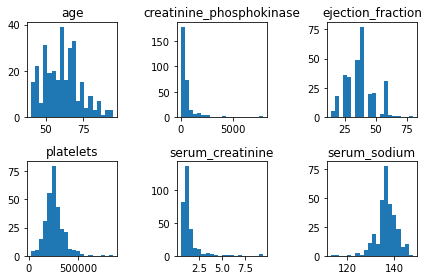

In [4]:
data = df.to_numpy(dtype='float')

plot(data)

### Стандартизация данных

Стандартизация на основе первых 150 наблюдений (StandardScaler)

In [5]:
scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)

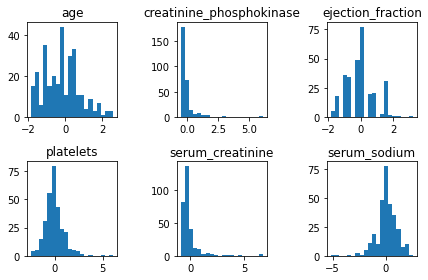

In [6]:
plot(data_scaled)

Мат. ожидание и СКО (до и после стандартизации)

In [7]:
# до стандартизации
np.mean(data, axis=0), np.std(data, axis=0) 

(array([6.08338930e+01, 5.81839465e+02, 3.80836120e+01, 2.63358029e+05,
        1.39387960e+00, 1.36625418e+02]),
 array([1.18749014e+01, 9.68663967e+02, 1.18150335e+01, 9.76405477e+04,
        1.03277867e+00, 4.40509238e+00]))

In [8]:
# после стандартизации
np.mean(data_scaled, axis=0), np.std(data_scaled, axis=0)

(array([-0.16970362, -0.02127675,  0.01050249, -0.03522879, -0.1086408 ,
         0.0379076 ]),
 array([0.95382379, 0.81417905, 0.90610822, 1.01506113, 0.88542887,
        0.9703736 ]))

Сравнение значений с полями mean_ и var_ объекта scaler

In [9]:
scaler.mean_, scaler.var_

(array([6.29466667e+01, 6.07153333e+02, 3.79466667e+01, 2.66746749e+05,
        1.52060000e+00, 1.36453333e+02]),
 array([1.54997156e+02, 1.41548882e+06, 1.70023822e+02, 9.25286050e+09,
        1.36052697e+00, 2.06078222e+01]))

Стандартизация на основе всех наблюдений (StandardScaler)

In [10]:
data_scaled = preprocessing.StandardScaler().fit_transform(data)

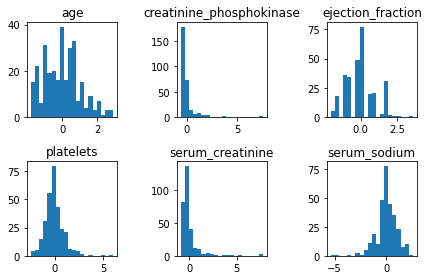

In [11]:
plot(data_scaled)

Мат. ожидание и СКО (после стандартизации)

In [12]:
np.mean(data_scaled, axis=0), np.std(data_scaled, axis=0)

(array([ 5.70335306e-16,  0.00000000e+00, -3.26754603e-17,  7.72329061e-17,
         1.42583827e-16, -8.67384945e-16]),
 array([1., 1., 1., 1., 1., 1.]))

### Приведение к диапазону

Приведение данных к диапазону (MinMaxScaler)

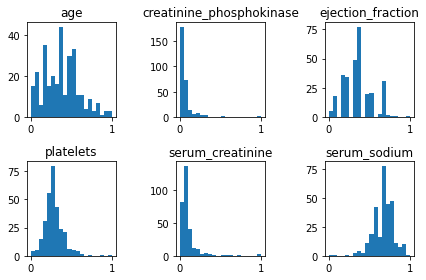

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data)

plot(data_min_max_scaled)

In [14]:
min_max_scaler.data_min_, min_max_scaler.data_max_ 

(array([4.00e+01, 2.30e+01, 1.40e+01, 2.51e+04, 5.00e-01, 1.13e+02]),
 array([9.500e+01, 7.861e+03, 8.000e+01, 8.500e+05, 9.400e+00, 1.480e+02]))

Аналогично используя MaxAbsScaler и RobustScaler

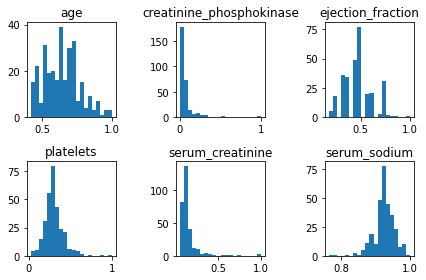

In [15]:
data_max_abs_scaled = preprocessing.MaxAbsScaler().fit_transform(data)

plot(data_max_abs_scaled)

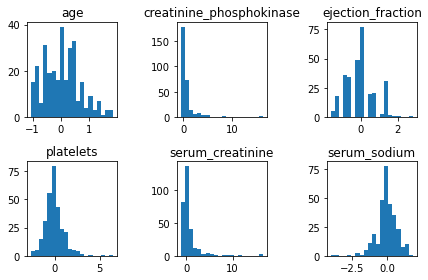

In [23]:
data_robust_scaled = preprocessing.RobustScaler().fit_transform(data)

plot(data_robust_scaled)

Функция, которая приводит данные к диапазону [-5 10]

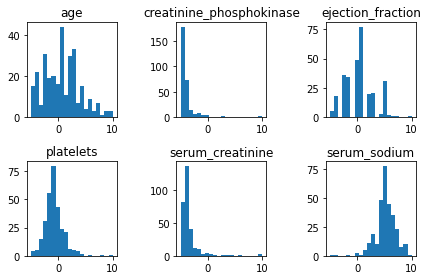

In [17]:
data_custom = preprocessing.MinMaxScaler(feature_range=[-5, 10]).fit_transform(data)

plot(data_custom)

### Нелинейные преобразования

Приведение данных к равномерному распределению (QuntileTransformer)

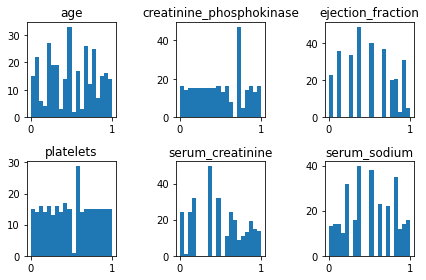

In [18]:
data_quantile_scaled = preprocessing.QuantileTransformer(n_quantiles = 100, random_state=0).fit_transform(data)

plot(data_quantile_scaled)

Приведение данных к нормальному распределению

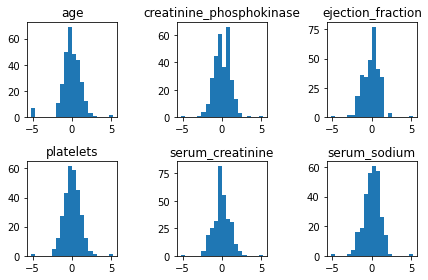

In [19]:
data_normal_scaled = preprocessing.QuantileTransformer(n_quantiles = 100, random_state=0, output_distribution='normal').fit_transform(data)

plot(data_normal_scaled)

Приведение данных к нормальному распределению используя PowerTransformer

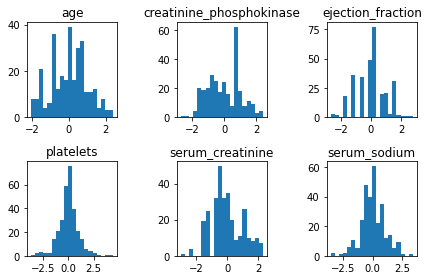

In [20]:
data_normal_scaled = preprocessing.PowerTransformer().fit_transform(data)

plot(data_normal_scaled)

### Дискретизация признаков

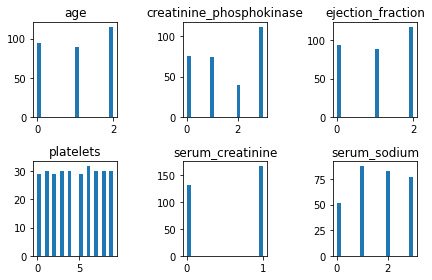

In [21]:
data_kbin_discret = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal')

plot(data_kbin_discret.fit_transform(data))

Диапазоны каждого интервала для каждого признака

In [22]:
data_kbin_discret.bin_edges_

array([array([40., 55., 65., 95.]),
       array([  23. ,  116.5,  250. ,  582. , 7861. ]),
       array([14., 35., 40., 80.]),
       array([ 25100., 153000., 196000., 221000., 237000., 262000., 265000.,
       285200., 319800., 374600., 850000.]),
       array([0.5, 1.1, 9.4]), array([113., 134., 137., 140., 148.])],
      dtype=object)